In [1]:
#A continuación importamos las librerias que utilizaremos. 

import numpy as np
import os
import matplotlib.pyplot as plt
import subprocess
import sympy as sym
import math
from scipy.optimize import curve_fit as cfit

# Taller 1: Métodos Computacionales
### Estudiantes: Andrés Hernández ()    Francisco Díaz (201912252)

## 1. Caída libre
### 1.1 
Considere las ecuaciones de movimiento para una partícula en caída libre para el caso ideal:

$$
\begin{align*}
m\frac{d^{2}y}{dt^{2}} &= -mg   & y(t) &= y_{0} +v_{0}t-\frac{1}{2}gt^{2} 
\end{align*}
$$
donde $g= 9.8 \; m/s^2$ ,$y_{0} = 0$ y $v_{0} = 50 \; m/s $.

**a)** Dibuje la posición y velocidad como función del tiempo, iterando hasta que el sistema llegue hasta la posición inicial.

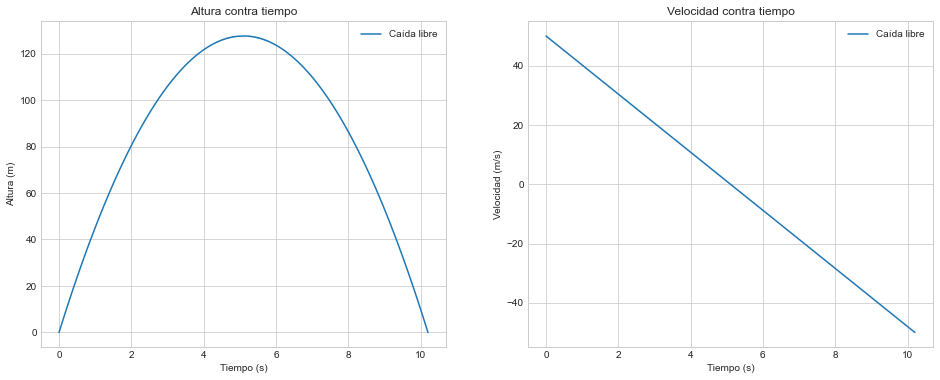

In [43]:
#Primero definiremos las clases de acuerdo al tipo de movimiento que el usuario requiera:
class libre:
    g=9.8
    def __init__(self, y0_ = 0.0, vy0_ = 50.0, m0_ = 2.0):
        self.y=y0_
        self.vy=vy0_
        self.m=m0_
        self.Fy=-self.m*self.g
        self.Ttotal = 0
    def muevete(self , dt_):
        self.y += self.vy*dt_
        self.vy += (self.Fy/self.m)*dt_
    def imprime(self,t_):
        return "{0:.3f}   {1:.3f}   {2:.3f}".format(t_ , self.y, self.vy)
    def darY(self,t):
        return self.y
class amortiguado(libre):
    def __init__(self,y0=0.0,vy0=50.0,m0=2.0,C0=0.8,rho0 = 1.225, R0 = 0.05):
        super().__init__(y0,vy0,m0)
        self.C=C0
        self.rho = rho0
        self.R= R0
        self.Fy=-m0*self.g+(1/2)*rho0*C0*(np.pi*(R0**2))*(vy0**2)
    def muevete(self,dt):
        super().muevete(dt)
        self.Fy=-self.m*self.g-(1/2)*self.rho*self.C*(np.pi*(self.R**2))*(self.vy**2)
    def imprime(self,t):
        return "{0:.3f}   {1:.3f}   {2:.3f}".format(t,self.y,self.vy)
#Definiremos las variables globales correspondientes a los tiempos de vuelo de cada movimiento

TFinal1, TFinal2 = 0. , 0.

#Para generar el conjunto de datos creamos un archivo temporal .dat

def generardatos(clase,filename,c):
    if filename == "amortiguado":
        cuerpo=clase(C0=c)
    else:
        cuerpo=clase()
    t=0.0
    dt=1.0e-4  #Diferencial de tiempo que utilizaremos
    f=open(filename+".dat","w+")
    while cuerpo.darY(t) >= 0:    
        st=cuerpo.imprime(t)
        f.write(st+"\n")
        cuerpo.muevete(dt)
        t+=dt
    st=cuerpo.imprime(t)
    #Almacenamos el tiempo de vuelo del respectivo tipo de movimiento para el punto (c)
    if filename =='libre':
        global TFinal1
        TFinal1=t
    else:
        global TFinal2
        TFinal2=t
    f.write(st)
    f.close()


#Generamos y realizamos la lectura de los datos. Adicionalmente, eliminamos el archivo temporal.

generardatos(libre,"libre",0.8)

def readxyv(filename,i,j,k):
    f=open(filename+".dat","r")
    l=f.readlines()
    f.close()
    x,y,v=[],[],[]
    for n in l:
        dat=n.split()
        x.append(float(dat[i]))
        y.append(float(dat[j]))
        v.append(float(dat[k]))
    os.remove(filename+".dat")
    return x,y,v

### Ahora graficaremos la trayectoría par la caída libre ideal

x1,y1,v1=readxyv("libre",0,1,2)

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax1.plot(x1,y1,label="Caída libre")
ax1.set(xlabel='Tiempo (s)', ylabel='Altura (m)',title='Altura contra tiempo')
ax1.legend()

ax2=fig.add_subplot(122)
ax2.plot(x1,v1,label="Caída libre")
ax2.set(xlabel='Tiempo (s)', ylabel='Velocidad (m/s)',title='Velocidad contra tiempo')
ax2.legend()

plt.style.use('seaborn-whitegrid')
plt.show()



Ahora asuma que el sistema está sometido a una fuerza resistiva:
\begin{align*}
 m\frac{d^{2}y}{dt^{2}} &= -b +\frac{1}{2}C \rho A v^{2}  & y(t) &= y_{0} + \frac{1}{\gamma ^{2}} ln \left [ \frac{\cosh(\tanh^{-1}(\frac{\gamma v_{0}}{\sqrt{g}}))}{\cosh(-\gamma \sqrt{g}t+\tanh^{-1}(\frac{\gamma v_{0}}{\sqrt{g}})}\right]
\end{align*}

 donde $C=0.8$ , $\rho = 1.225 \; kg/m^{3}$ y $A=\pi R^{2}$ con $R=0.05 \; m$.
 #### Nota: La demostración analítica de estas ecuaciones se encuentra adjunta en formato pdf.
 
 **b)** Dibuje la posición y velocidad como función del tiempo en la misma gráfica del caso ideal

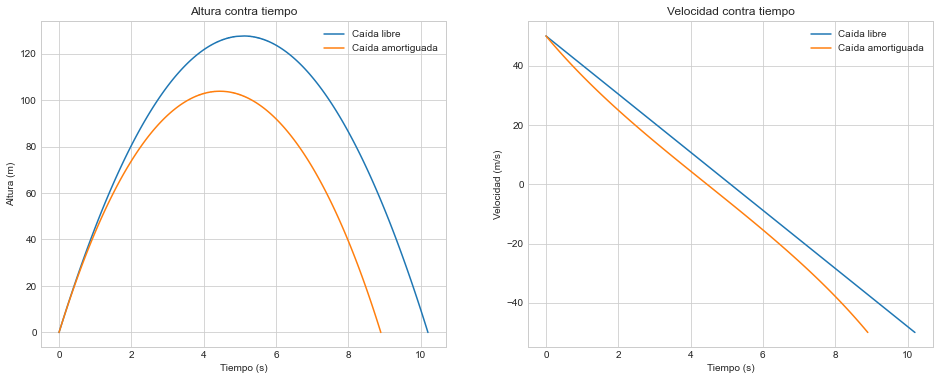

In [38]:
#Generamos los datos correspondientes al movimiento amortiguado.
generardatos(amortiguado,"amortiguado",0.8)

### Ahora graficaremos las trayectorias

x2,y2,v2=readxyv("amortiguado",0,1,2)

fig2=plt.figure(figsize=(16,6))
ax3=fig2.add_subplot(121)
ax3.plot(x1,y1,label="Caída libre")
ax3.plot(x2,y2,label="Caída amortiguada")
ax3.set(xlabel='Tiempo (s)', ylabel='Altura (m)',title='Altura contra tiempo')

ax4=fig2.add_subplot(122)
ax4.plot(x1,v1,label="Caída libre")
ax4.plot(x2,v2,label="Caída amortiguada")
ax4.set(xlabel='Tiempo (s)', ylabel='Velocidad (m/s)',title='Velocidad contra tiempo')
ax3.legend()
ax4.legend()
plt.style.use('seaborn-whitegrid')
plt.show()



**c)** ¿Cuál es el tiempo de vuelo para ambos casos?

In [4]:
print("Utilizando los datos almacenados en el inciso (a) tenemos que: \nTiempo de vuelo caída libre = " +str(TFinal1)+ " s \nTiempo de vuelo caida amortiguada = "+str(TFinal2)+" s")


Utilizando los datos almacenados en el inciso (a) tenemos que: 
Tiempo de vuelo caída libre = 10.219999999999827 s 
Tiempo de vuelo caida amortiguada = 8.929999999999854 s


**d)** ) Estudie el comportamiento del tiempo de vuelo como función de C.


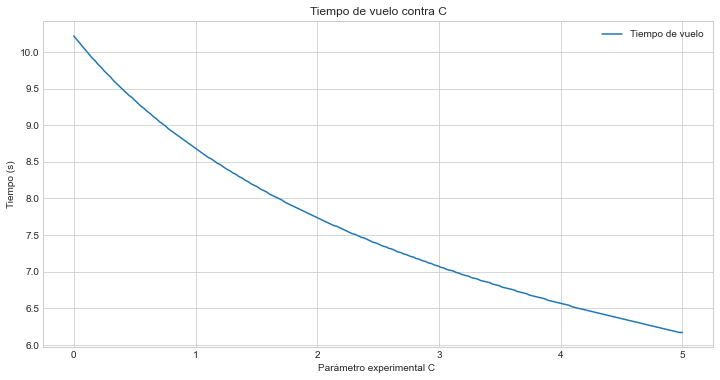

In [48]:
#Definiremos una nueva función generadora de datos en la que solo almacenaremos el tiempo de vuelo respecto al valor de entrada C
def generardatosC(clase , c):
    tiempoVuelo=[]
    i=0
    while i < len(c):
        cuerpo=clase(C0=c[i])
        t=0.0
        dt=1.0e-2 
        while cuerpo.darY(t) >= 0:    
            cuerpo.muevete(dt)
            t+=dt
        tiempoVuelo.append(t)  
        i +=1
    return tiempoVuelo


#Graficando el tiempo de vuelo contra el parámetro experimental C

c=np.linspace(0 , 5 , 200)
tiempos= generardatosC(amortiguado,c)

plt.figure(figsize=(12,6))
plt.plot(c,tiempos,label="Tiempo de vuelo")
ax=plt.gca()
ax.set(xlabel='Parámetro experimental C ', ylabel='Tiempo (s)',title='Tiempo de vuelo contra C')

plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

    

## 2. Números primos y Fibonnaci
**1)**  Escriba en codigo que calcule los primeros 1000 números primos.


In [6]:
#Definimos la función que calculará los N primeros números primos.
def NPrimos(N):
    primos=[]
    n=2
    while len(primos) < N:
        for k in range(2,n+1):
            if n%k == 0: divisor=k; break
        if divisor == n: 
            primos.append(n)
        n +=1
    return primos

#Imprimimos los 1000 primeros números primos.

MisPrimos = NPrimos(1000)
print(MisPrimos)

    

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

**2)** Dibuje los números en función de su posición ¿Encuentra alguna regularidad en la gráfica?


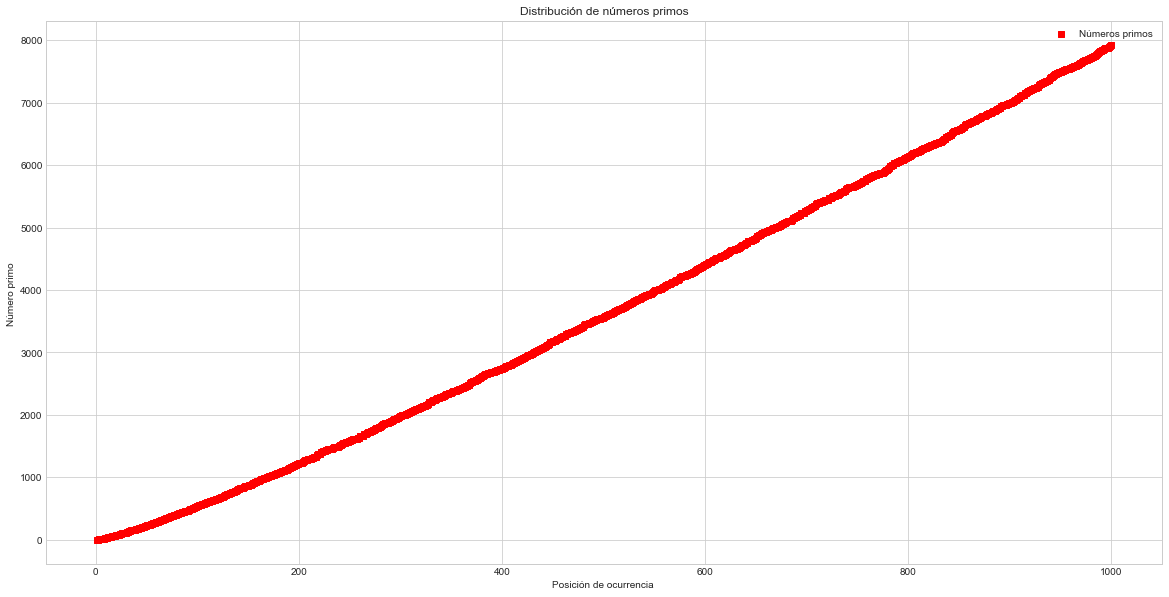

In [63]:
#Graficamos los primos en función de su orden de su posición

x=np.linspace(1,1000,1000)

plt.figure(figsize=(20,10))
plt.scatter(x,MisPrimos,marker=',',color='r',label="Números primos")
ax=plt.gca()
ax.set(xlabel='Posición de ocurrencia ', ylabel='Número primo ',title='Distribución de números primos')

plt.legend()
plt.style.use('seaborn-whitegrid')

plt.show()

A simple vista se puede percibir una posible regularidad, cabe notar que el "gap", es decir la distancia entre primos adyacentes $y_{i} , y_{i+1}$, aumenta conn respecto a la posición de ocurrencia $i$.

**3)** Genere los primeros 30 números de la sucesión de Fibonnaci. Use la sucesión para calcular el número áureo $\varphi = \frac{q+\sqrt{5}}{2} \approx 1.61803398$ (Opcionalmente, ¿Cuál es el origen de este número?).

Para calcular el número aúreo utilizaremos su definición en términos del límite $\varphi = \lim_{n \rightarrow \infty}\frac{F_{n+1}}{F_{n}} $, veáse A001622 en OEIS (Online Encyclopedia of Integer Sequences).

In [8]:
#Definimos la secuencia de Fibonnaci recursivamente.

def fibonacci(n):
    if n==0 or n==1:
        return n
    elif n<0:
# Por su definición, la secuencia también podría avanzar hacia los negativos.
        return fibonacci(n+2)-fibonacci(n+1)
    else:
        return fibonacci(n-1)+fibonacci(n-2)
    
#Imprimimos los n primeros términos de la secuencie de Fibonnaci (Incluimos el término F_0).

def fiboSecu(N_):
    fiboNum=[] 
    while len(fiboNum) < N_:
        fiboNum.append(fibonacci(len(fiboNum)))
    return fiboNum
MiSecu = fiboSecu(30)
print("Los primeros 30 números de Fibonnaci son: \n"+str(MiSecu[0:30])+"\n")

#Calculamos el número aúreo utilizando su definición en términos del límite.

def calculoPhi(Secu_):
    MiSecu = Secu_
    MiPhi=[]
    n=1
    while n < len(Secu_)-1:
        MiPhi.append( MiSecu[n+1]/MiSecu[n])
        n+=1
    return MiPhi

MiPhi=calculoPhi(MiSecu)[-1]
print("Utilizando su definición en términos del límite, el valor del número áureo es aproximadamente igual a " +str(MiPhi))

Los primeros 30 números de Fibonnaci son: 
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]

Utilizando su definición en términos del límite, el valor del número áureo es aproximadamente igual a 1.6180339887543225


En un principio el número aúreo fue estudiado por civilizaciones antiguas, en especial los griegos, debido a su frecuente ocurrencia en la geometría. Más aún, en la antiguedad era considerado como un número relacionado con la divinidad, debido a que el ser humano siempre ha ligado la simetría a la belleza. Matemáticamente hablando, el número aúreo es un número irracional y algebráico cuyo polinomio minimal está dado por $x^{2}-x-1$.

**4)** Estime un error relativo $\epsilon = \frac{|Estimated\; - \; Real |}{Real}$

In [9]:
#Utilizando el estimativo relaizado anteriormente obtenemos el respectivo error relativo.

RealPhi = (1+np.sqrt(5))/2
errorR = np.abs(RealPhi-MiPhi)/RealPhi
print("El error relativo de la estimación realizada es igual a "+str(errorR))

El error relativo de la estimación realizada es igual a 2.7363883904725003e-12


**5)** Haga una gráfica entre la precisión $\epsilon$ vs la cantidad de números generados en la sucesión. Adicionalmente,
haga un ajuste polinomial para encontrar la dependencia. Esto debería ser algo como: $\epsilon \propto \frac{1}{\sqrt{n}}$

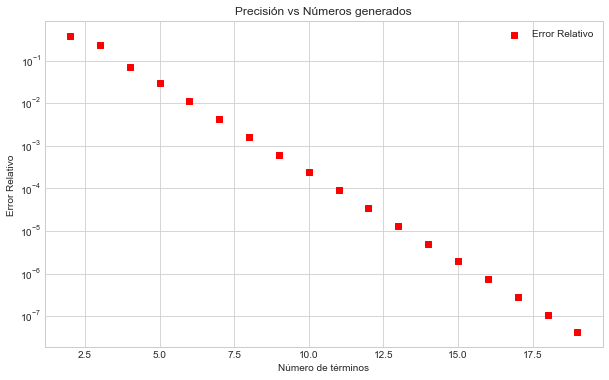

In [66]:
#Definimos el número total de términos que generaremos

N=20
MiSecu= fiboSecu(N)
listaPhi=calculoPhi(MiSecu)

listaError=[]

n=0
while n < len(listaPhi):
    errorR = np.abs(RealPhi-listaPhi[n])/RealPhi
    listaError.append(errorR)
    n+=1

x=np.linspace(2,N-1,N-2)



plt.figure(figsize=(10,6))
plt.scatter(x,listaError,marker=',',color='r',label="Error Relativo")
ax=plt.gca()
ax.set(xlabel='Número de términos', ylabel='Error Relativo ',title='Precisión vs Números generados')
plt.yscale('log')
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

## 3. Fitting
**1)** Bajar los datos disponibles en https://github.com/asegura4488/MetodosCompu2021/blob/main/Week2/Data/Hw_data.dat

**2)** Gráficar los datos para visualizar la función.

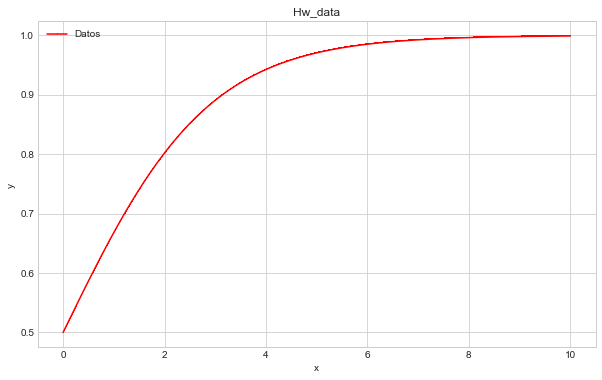

In [67]:
#Definimos la función para la lectura de datos
def readData(filename):
    f=open(filename+".dat","r")
    l=f.readlines()
    f.close()
    x,y=[],[]
    for n in l:
        dat=n.split()
        x.append(float(dat[0]))
        y.append(float(dat[1]))
    return x,y



#Leemos y graficamos los datos
x,y = readData("Hw_data")

plt.figure(figsize=(10,6))

plt.plot(x,y,marker=',',color='r',label="Datos")
ax=plt.gca()
ax.set(xlabel='x', ylabel='y ',title='Hw_data')

plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()


**3)** Hacer un ajuste (usando scipy) a los datos para encontrar los parámetros $A$ y $B$:
$$
f(t)=\frac{A}{1+ \exp^{-Bt}}
$$

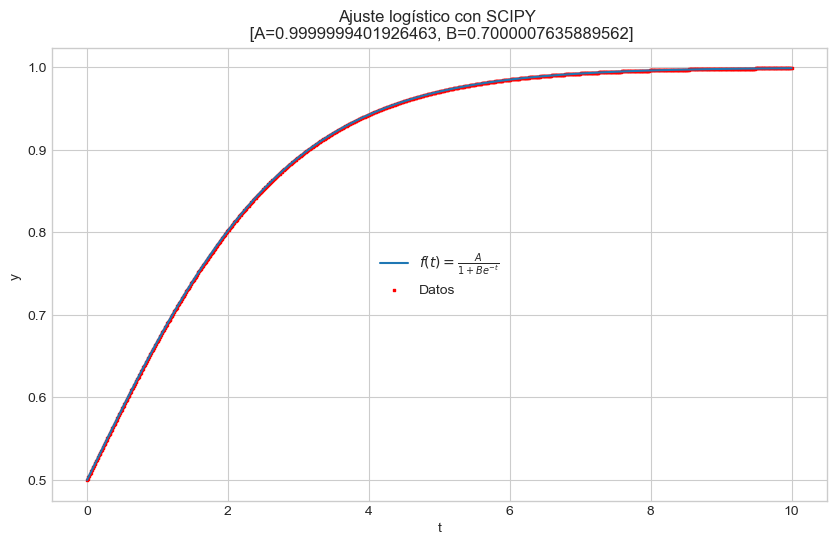

In [75]:
#Primero realizamos el ajuste logístico utilizando SCIPY
ajusteExp=lambda x,A,B: A/(1+np.exp(-B*np.float64(x)))
popth,pcovh=cfit(ajusteExp,x,y)
A,B=popth
yAjuste=ajusteExp(x,A,B)

# Gráfica de la función de los datos junto con el ajuste logístico

plt.figure(figsize=(10,6),dpi=100)
plt.scatter(x,y,s=2,color='r',marker=',')
plt.plot(x,yAjuste)
ax = plt.gca()
ax.set(xlabel='t', ylabel='y ',title='Ajuste logístico con SCIPY \n [A='+str(A)+', B='+str(B)+']')

plt.legend([r'$f(t)=\frac{A}{1+Be^{-t}}$' ,'Datos'],loc='center')
plt.style.use('seaborn-whitegrid')
plt.show()

## 4. Método de Newton-Raphson
**1)** Modifique el código visto en clase para estimar automáticamente todas las raíces reales del
polinomio (importante para el último punto):
$$
f(x)= 3x^{5}+5x^{4}-x^{3}
$$

In [107]:
#Definimos la función y su derivada utilizando la derivada central
def Function(x):
    return (3*(x**5))+(5*(x**4))-(x**3)
    
def Derivada(f,x,h):
    d=0.
    
    if(h!=0):
        
        d= (f(x+h)-f(x-h))/(2*h)
    return d

#Definimos el método de NewtonRaphson
def NewtonMethod(f,df,xn, error, it, precision = 0.0001, iterations=1000):
    
    h_= 1.0e-4
    
    while error > precision and it < iterations:
        
        try:
            xn1 = xn - f(xn)/df(f,xn,h_)
            error = np.abs((xn1-xn)/xn1)
            
        except ZeroDivisionError:
            print("Hay división por cero.")
            
            
        xn = xn1
        
        it = it +1   
    return xn1

#Definimos la función que encuentra las raíces sin repetición

def polyRoots(f_,x_):
    roots =[]
    for i in x_:
        root = NewtonMethod(f_, Derivada,i, 1000,0)
        root = round(root,  5)
        if ((root in roots) == False):
            roots.append(root)
    return roots
    
    
#Encontramos las raíces

Xtest = np.linspace(-5,5,100)
raices = polyRoots(Function,Xtest)


print("Las raíces de la función están dadas por: \n" +str(raices))

Las raíces de la función están dadas por: 
[-1.84713, 0.18046, -0.0]


## 5. Derivadas
Para el siguiente punto,el códico en C++ se encuentra en un archivo .cpp en la carpeta. A continuación realizaremos la ejecución del archivo Derivada.cpp, realizaremos la lectura del archivo generado derivada.dat y posteriormente graficaremos los resultados en Python.


**1)** Usando $h = 0.05$, estimar la derivada central de la función:
$$ f(x)= x -\sin(x) $$

In [78]:
#En caso de no haber compilado y ejecutado el archivo Derivacion.cpp ejecute el siguiente código:
os.system("g++ Derivacion.cpp")
os.system("./a.out")


1

In [79]:
#Realizaremos la lectura del archivo derivada.dat
def readDataCpp(filename):
    f=open(filename+".dat","r")
    l=f.readlines()
    f.close()
    dataBase = l[0]
    config, x,f,dfc, dfe, error=[],[], [],[],[], []
    config = dataBase.split()
    for n in l[1:]:
        dat=n.split()
        x.append(float(dat[0]))
        f.append(float(dat[1]))
        dfc.append(float(dat[2]))
        dfe.append(float(dat[3]))
        error.append(float(dat[4]))
    return config,x,f,dfc,dfe,error

config,X,FX,DFC,DFE,Error = readDataCpp("derivada")


a) Derivada de la función en el punto $x=0$ :

In [16]:
print("La derivada de la función en el punto x= 0 es "+config[1])

La derivada de la función en el punto x= 0 es 0.000416615


b) En el intervalo $ -1< x < 1 $ graficamos: 

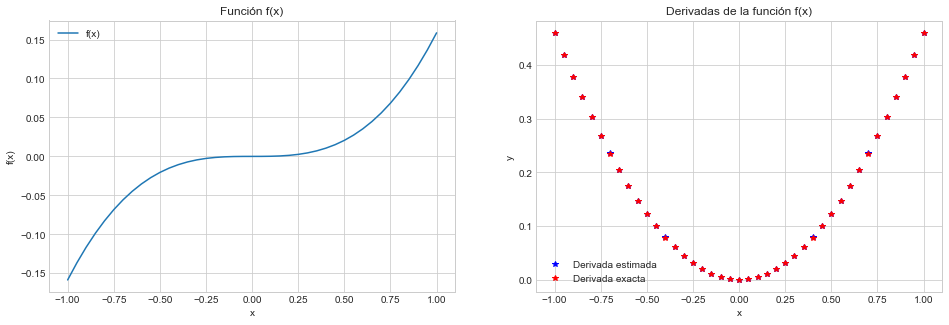

In [17]:
#Ahora graficaremos:

fig3=plt.figure(figsize=(16,5))
ax1=fig3.add_subplot(121)
ax1.plot(X,FX,label="f(x)")
ax1.set(xlabel='x', ylabel='f(x)',title='Función f(x)')

ax2=fig3.add_subplot(122)
ax2.plot(X,DFC,'b*',label="Derivada estimada" )
ax2.plot(X,DFE,'r*' ,label="Derivada exacta")
ax2.set(xlabel='x', ylabel='y',title='Derivadas de la función f(x)')
ax1.legend()
ax2.legend()

plt.style.use('seaborn-whitegrid')
plt.show()

c) Estimar el error en cada nodo y el error global de la aproximación en el intervalo anterior.

Para la estimación de la derivada se utilizaron 41.0 puntos para un h= 0.05 .
Con esta estimación se obtuvo un error global igual a 0.00159948


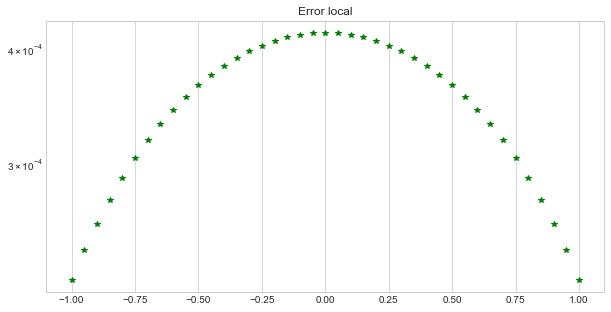

In [18]:
plt.figure(figsize=(10,5))
plt.plot(X,Error,'g*',label='Central Derivative' )
plt.title('Error local')
plt.yscale('log')


puntos = float(config[0])
h = 2/(puntos-1)

print("Para la estimación de la derivada se utilizaron "+str(puntos)+ " puntos para un h= " +str(h)+" ." )
print("Con esta estimación se obtuvo un error global igual a "+config[2] )

**2)** Demuestre que la segunda derivada discreta puede también escribirse como:
$$
\frac{d^{2}f(x_{j})}{dx^{2}} = \frac{f(x_{j+2}) - 2f(x_{j})+f(x_{j-2})}{4h^2}
$$
***Nota: Esta demostración se encuentra adjunta en el pdf "Taller 1 Analítico".***


Usando la función del punto anterior, compare el error punto a punto de ambas formulas. ¿Las dos definiciones son consistentes?

Las fórmulas de estimacion para la segunda derivada que utilizaremos son las siguientes:
    
$$
\begin{align*}
\frac{d^{2}f(x_{j})}{dx^{2}} &= \frac{f(x_{j+2}) - 2f(x_{j})+f(x_{j-2})}{4h^2} & \frac{d^{2}f(x_{j})}{dx^{2}} &= \frac{f(x_{j+1}) - 2f(x_{j})+f(x_{j-1})}{h^2} 
\end{align*}
$$
Estas dos métodos de estimacion los denotamos en el siguiente proceso como ***Método 1*** y ***Método 2*** respectivamente.

In [82]:
#En caso de no haber compilado y ejecutado el archivo Derivacion.cpp ejecute el siguiente código:
os.system("g++ Derivacion2.cpp")
os.system("./a.out")

1

In [81]:
#Realizaremos la lectura del archivo derivada.dat
def readDataCpp(filename):
    f=open(filename+".dat","r")
    l=f.readlines()
    f.close()
    dataBase = l[0]
    config, x,df1,df2, dfe, error1,error2=[],[], [],[],[], [], []
    config = dataBase.split()
    for n in l[1:]:
        dat=n.split()
        x.append(float(dat[0]))
        df1.append(float(dat[1]))
        df2.append(float(dat[2]))
        dfe.append(float(dat[3]))
        error1.append(float(dat[4]))
        error2.append(float(dat[5]))
    return config,x,df1,df2, dfe, error1,error2

config2,X,DF1,DF2,DFE,Error1,Error2 = readDataCpp("derivada2")
puntos = float(config2[0])
h = 2/(puntos-1)


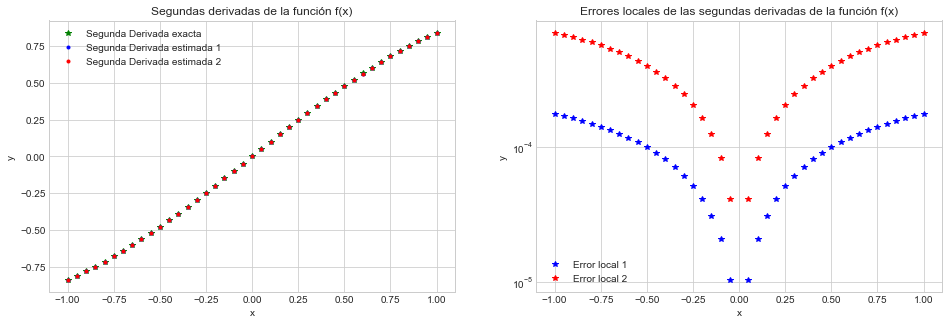

Para la estimación de la derivada se utilizaron 41.0 puntos para un h= 0.05
Con la primera estimación se obtuvo un error global igual a 0.000208316
Con la segunda estimación se obtuvo un error global igual a 0.000833056


In [89]:
#Ahora graficaremos las derivadas con el método 1, el método 2 y la derivada exacta:

fig4=plt.figure(figsize=(16,5))

ax1=fig4.add_subplot(121)
ax1.plot(X,DFE,'g*' ,label="Segunda Derivada exacta")
ax1.plot(X,DF1,'b.',label="Segunda Derivada estimada 1" )
ax1.plot(X,DF2,'r.' ,label="Segunda Derivada estimada 2")

ax1.set(xlabel='x', ylabel='y',title='Segundas derivadas de la función f(x)')
#Adicionalmente graficamos los errores locales de ambos métodos:
ax2=fig4.add_subplot(122)
ax2.plot(X,Error1,'b*',label="Error local 1" )
ax2.plot(X,Error2,'r*' ,label="Error local 2")
ax2.set(xlabel='x', ylabel='y',title='Errores locales de las segundas derivadas de la función f(x)')
ax2.set_yscale('log')
ax1.legend()
ax2.legend()

plt.style.use('seaborn-whitegrid')
plt.show()
print("Para la estimación de la derivada se utilizaron "+str(puntos)+ " puntos para un h= " +str(h) )
print("Con la primera estimación se obtuvo un error global igual a "+config2[1] )
print("Con la segunda estimación se obtuvo un error global igual a "+config2[2] )

Nótese que tanto los errores locales como el error global del método 2 son mayores. Esto se debe a que en realidad estos dos métodos no son consistentes, es decir, aunque los dos son métodos de estimación el primero corresponde a una estimación utilizando la segunda derivada central , mientras que el segundo corresponde a una combinación lineal de la segunda derivada regresiva y la segunda derivada progresiva. Cabe resaltar que el orden de estimación del método 1 es de $E_{1} \approx \frac{1}{12} h^{2}f^{(4)}(x_j)$ mientras que el del método 2 es de $ E_{2} \approx \frac{1}{3}h^{2}f^{(4)}(x_j)$ .

## 6.Integración
**1)**  Implementar la regla de Simpson 3/8 y $h = 0.01$ para estimar:
$$
\int_{0}^{1} e^{-x^2}dx
$$
Compare los errores entre la regla de Simpson 1/3 y 3/8

In [102]:
#Primero definimos las funciones que utilizaremos para la integración.

expFunction =lambda x: np.exp(-x**2)

def Simpson13Method(f,X):
    n= len(X)
    h=(X[-1]-X[0])/(n-1)
    
    integral = 0.
    
    integral += f(X[0])+f(X[-1])
    i=1
    while i < n-1:
        if i%2 == 1:
            integral += 4.*(f(X[i]))
        else:
            integral+= 2*(f(X[i]))
        i+=1
    integral*= (1/3)*h
    
    return integral, h

def Simpson38Method(f,X):
    n= len(X)
    h=(X[-1]-X[0])/(n-1)
    
    integral = 0.
    
    integral += f(X[0])+f(X[-1])
    i=1
    while i < n-1:
        if i%3 == 0:
            integral += 2.*(f(X[i]))
        elif i%3 ==1:
            integral += 3.*(f(X[i]))
        else:
            integral+= 3.*(f(X[i]))
        i+=1
    integral*= (3/8)*h
    
    return integral, h

def D4(f,x,h):
    
    d = 0.
    
    if(h!=0):
        d = ( f(x+2*h) - 4*f(x+h) + 6*f(x) - 4*f(x-h) + f(x-2*h) )/h**4
        
    return d

#Ahora definimos las funciones que nos generarán el error para cada método.

def ErrorSimpson13(X, D4Y):
    
    max_= np.max(np.abs(D4Y))
    
    error = ((h**5)*max_)/(90)
    return error
 
def ErrorSimpson38(X, D4Y):
    
    max_= np.max(np.abs(D4Y))
    
    error = ((h**4)*max_)/(80)
    return error

#Por último definimos nuestros espacios muestrales y calculamos.

xi, xf = 0.,1 
h = 0.01
Npoints = (xf -xi) /h
X= np.linspace(xi, xf, int(Npoints+1))
D4Y= D4(expFunction, X, h)

IntegralSimpson38, h1 = Simpson38Method(expFunction,X)
IntegralSimpson13, h2 = Simpson13Method(expFunction,X)
ErrorSimpson13 = ErrorSimpson13(X,D4Y)
ErrorSimpson38 = ErrorSimpson38(X,D4Y)

print("El valor de la integral de f(x) en el intervalo [0,1] para un h= " +str(h) + " es igual a :")
print("Método Simpson 3/8: " + str(IntegralSimpson38))
print("Método Simpson 1/3: " + str(IntegralSimpson13))
print("Con estos dos métodos obtenemos errores estimados dados por:")
print("Método Simpson 3/8: " + str(ErrorSimpson13) , " \nMétodo Simpson 1/3: " + str(ErrorSimpson38))

El valor de la integral de f(x) en el intervalo [0,1] para un h= 0.01 es igual a :
Método Simpson 3/8: 0.7458952524329903
Método Simpson 1/3: 0.7468241328941758
Con estos dos métodos obtenemos errores estimados dados por:
Método Simpson 3/8: 1.3331111338289584e-11  
Método Simpson 1/3: 1.499750025557578e-09


**2)** Dada la aproximación de cuadratura gausiana:
$$
\int _{-1}^{1} f(x) = \sum_{k=0} ^{n} w_{k}f(x_{k})
$$
donde $w_{0},w_{1},...,w_{n}$ son los coeficientes ponderados.

(a) Halle numéricamente los ceros de los cuatro primeros polinomios de Legendre.

In [128]:
#Definimos la función generadora de los polinomios de Legendre.

def CreatePoly(n):
    
    x = sym.Symbol('x',real=True)
    y = sym.Symbol('y',real=True)
    
    y = (x**2-1)**n
    
    poly = sym.diff(y,x,n)/(2**n * math.factorial(n))
    
    return poly

#Generamos los cuatro primeros polinomios de LEgendre.
Legendre = []
i=1
while i < 5:
    
    Legendre.append(CreatePoly(i))
    i+=1

#Ahora encontramos los ceros de estos polinomios.

x = sym.Symbol('x',Real=True)

Xtest = np.linspace(-1,1,1000)
roots =[]


for i in Legendre:
    Function =sym.lambdify([x],i,'numpy')
    roots.append(polyRoots(Function, Xtest))

j=0  
while j < len(Legendre):
    print("Raíces del polinomio P"+str(j+1)+"(x)= " + str(Legendre[j])+ "\n " + str(roots[j]))
    j+=1

<ipython-input-107-76773b887b74>:22: RuntimeWarning: divide by zero encountered in double_scalars
  error = np.abs((xn1-xn)/xn1)
<ipython-input-107-76773b887b74>:22: RuntimeWarning: invalid value encountered in double_scalars
  error = np.abs((xn1-xn)/xn1)


Raíces del polinomio P1(x)= x
 [0.0]
Raíces del polinomio P2(x)= (3*x**2 - 1)/2
 [-0.57735, 0.57735]
Raíces del polinomio P3(x)= x*(5*x**2 - 3)/2
 [-0.7746, 0.7746, 0.0]
Raíces del polinomio P4(x)= (8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
 [-0.86114, 0.86114, 0.33998, -0.33998]


(d) Usando la librería sympy de Python y la Ecuación (12), calcular los pesos de ponderación para los
primeros 10 polinomios de Legendre. Compare que los resultados del paquete legendre.leggauss de Python.


In [129]:
#Generamos los diez primeros polinomios de Legendre.

def pesosPonderados (n):
    Legendre = []
    pondeW = []
    h = 0.01
    x = sym.Symbol('x',Real=True)
    Xtest = np.linspace(-1,1,1000)
    i=1
    while i < n:
        
        Legendre.append(CreatePoly(i))
        i+=1
    
    for j in Legendre:
        
        Function =sym.lambdify([x],j,'numpy')
        root = polyRoots(Function, Xtest)


    